In [1]:
#Install Packages I need
install.packages('TeachingDemos')
install.packages('png')
install.packages("ggimage")

library('TeachingDemos')
library('tidyverse')
library('RCurl')
library('png')
library('TeachingDemos')
library('ggimage')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘RCurl’


The following object is mask

# Marble Datasets

The group Marbula One Stats (Twitter handle @MarbulaStats) has all the information on the Marbula One races, marbles, and teams. They recorded and calculate several variables. Note CTP stands for Comprehensive Team Performance rating and CIP stands for Comprehensive Individual Performance Rating:

| Variable name |        Meaning                           |
|---------------|-------------------------------------------|
|  CIP_In-Race  |measures a marble's average performance during a race (finish position, positions gained/lost)      |
|CTP_In-Race    | measures a teams average performance      |
|CIP_weekend    |measures a marble's performance over the whole weekend (start position to finish position)           |
|CTP_weekend    |measures a teams's performance over the whole weekend                                               |
|CIP_Consistency|measures how consistently a marble performs|
|CTP_Consistency|measures how consistently a team performs  |
|PWR_Last       | Previous power ranking                    |
|PWR_Now        | Current power ranking                     |
|Av_Str_pos     | Average Starting Position                 |
|Av_fin_pos     | Average Finishing Position                |
|Str_Val        | Starting Position Value                   |
|Fin_Val        | Finishing Position Value                  |

The remainder of the variables are the qualifier position, final position, points scored, and lap times for each of the 8 rounds.

I used their google spreadsheet to investigate some questions I had about marble racing. Namely, I want to see what variables could be used predict the total points earned by at team.

- What scores a team more points- consistency or speed?
- Is the qualifier position a good indication of a marbles finishing position?
- Do marbles perform differently given the length of the track? I.E are there distance rollers and top sprinters?
- 

In [2]:
marbles<- read_csv('https://github.com/jcaldous/Bios512/raw/main/B%20512/Final%20project%20draft/Marbula%20One%20Statsheets%20.csv',
                  col_types = cols(
  .default = col_double(),
  Marble = col_character(),
  Team = col_character(),
  Rnk = col_character()
))
marbles%>%as_tibble()%>%print

# A tibble: 32 x 45
   Marble Team    Pts Rnk   CIP_In_Race CIP_Weekend CIP_Consistency CIP_Combined
   <chr>  <chr> <dbl> <chr>       <dbl>       <dbl>           <dbl>        <dbl>
 1 Anarc… Ball…    11 26            262         255            -2.4          224
 2 Clutt… Ball…    35 T9            486         540             6.7          477
 3 Billy  Gree…    28 14            397         472             3.6          403
 4 Malla… Gree…    36 8             563         614            17.4          567
 5 Smoggy Haze…    57 3             604         846            25.4          728
 6 Hazy   Haze…    37 7             562         595             9.4          539
 7 Vespa  Horn…     0 31             74         195           -13.8          102
 8 Hive   Horn…     8 T27           239         289            -4.3          231
 9 Limel… Lime…    24 15            398         476             3            404
10 Subli… Lime…     1 30            -14         166           -17.4           49
# … with

In [3]:
marbles.team<- read_csv('https://github.com/jcaldous/Bios512/raw/main/B%20512/Final%20project%20draft/Marbula%20One%20Statsheets%20-%20Team%20data.csv',
                       col_types=cols(
                              .default = col_double(),
                              Team = col_character(),
                              Rnk = col_character()
                       ))

marbles.team%>%as_tibble()%>%print

# A tibble: 17 x 37
   Team    Pts Rnk   CTP_In_Race CTP_Weekend CTP_Consistency CTP_Combined
   <chr> <dbl> <chr>       <dbl>       <dbl>           <dbl>        <dbl>
 1 Sava…   101 1             595         960             8.4          692
 2 Haze…    94 2             583         950             9.3          687
 3 O'Ra…    69 3             455         736             2.5          515
 4 Gree…    64 T5            480         699             4.8          513
 5 Snow…    66 4             466         662             2.5          481
 6 Team…    64 T5            481         625             3.9          472
 7 Team…    54 7             353         606            -1.5          403
 8 Mell…    44 10            330         629            -3.8          398
 9 Thun…    49 8             375         572            -0.8          395
10 Team…    39 11            324         575            -2.9          373
11 Host…    39 NA            414         448             0.9          352
12 Rojo…    32 13 

# What Scores a Team More Points: Consistency Vs Speed

I was curious about whether, in marble racing consistency or median time had a better correlation to points scored. To to so, I graphed CTP consistency scores against the teams' points total over the 8 rounds and the median team times for 7 of the 8 rounds against the total points. I fitted a best  line of best fit to both and printed the equation and r^2 values for both on the graphs.  

Note: There is were no lap times for Round 8.

In [6]:
gal <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Galactic.png'
chaos <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Chaos.png'
hazer <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hazers.png'
hornet <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hornet.png'
mellow <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Mellow.png'
momo <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Momo.png'
orangers <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Orangers.png'
primary <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Primary.png'
raspberry <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Raspberry.png'
rojo <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Rojo.png'
snow <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Snowball.png'
speeders <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Speedy.png'
whisps <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Whisps.png'
bolts <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/bolts.png'
ducks <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/ducks.png'
host <-'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/host.png'
limer<-'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Limer.png'
logos<- c(chaos,ducks,hazer,hornet,host,limer,mellow,whisps,
          orangers,raspberry,rojo,speeders,snow,gal,momo,primary,
          bolts)
mar.tm<-marbles.team%>%arrange(Team)
mar.tm$logo<- logos
mar.tm%>%as_tibble()%>%print

# A tibble: 17 x 38
   Team    Pts Rnk   CTP_In_Race CTP_Weekend CTP_Consistency CTP_Combined
   <chr> <dbl> <chr>       <dbl>       <dbl>           <dbl>        <dbl>
 1 Ball…    46 9             319         504            -3            336
 2 Gree…    64 T5            480         699             4.8          513
 3 Haze…    94 2             583         950             9.3          687
 4 Horn…     8 16            156         261           -13.4          124
 5 Host…    39 NA            414         448             0.9          352
 6 Lime…    25 15            192         382            -8            217
 7 Mell…    44 10            330         629            -3.8          398
 8 Midn…    34 12            282         519            -4.7          325
 9 O'Ra…    69 3             455         736             2.5          515
10 Rasp…    25 14            287         445            -6.1          284
11 Rojo…    32 13            390         450            -0.2          341
12 Sava…   101 1  

In [7]:
lm_eqn <- function(mar.tm){
  m <- lm(Pts ~ CTP_Consistency, mar.tm);
  eq <- substitute(italic(Pts) == a + b %.% italic(CTP_Consistency)*","~~italic(r)^2~"="~r2, 
                   list(a = format(unname(coef(m)[1]), digits = 2),
                        b = format(unname(coef(m)[2]), digits = 2),
                        r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}

`geom_smooth()` using formula 'y ~ x'



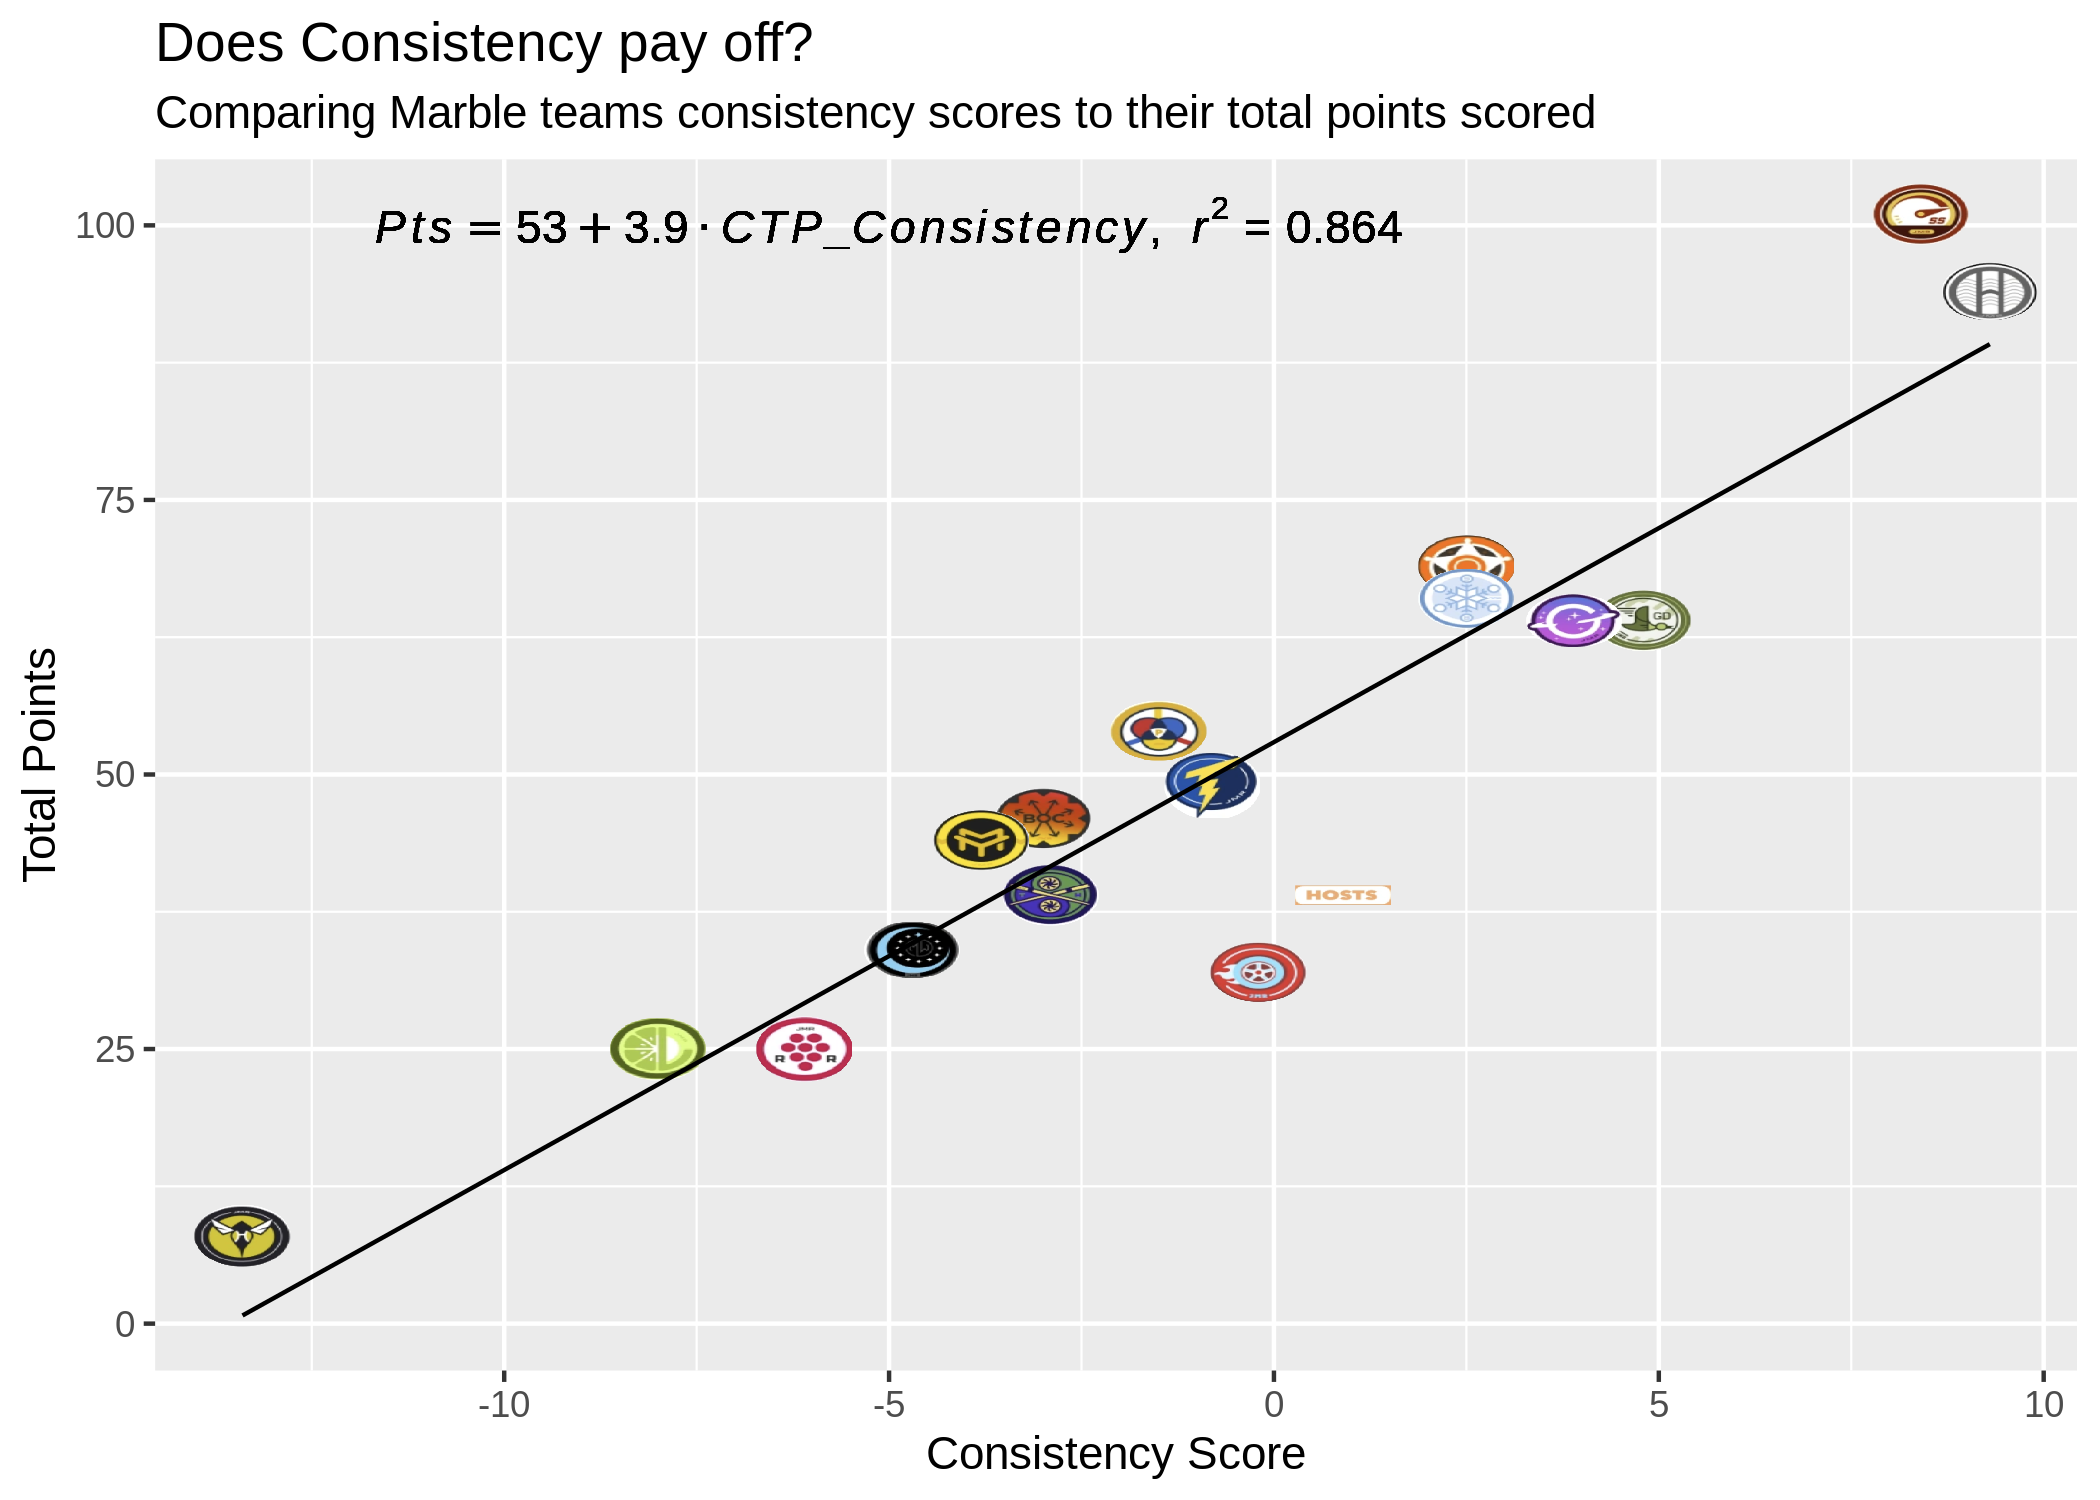

In [8]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res=300)
p=ggplot(mar.tm, aes(x=CTP_Consistency, y=Pts))
p=p+ geom_image(aes(image=logo), size=.05) + 
  geom_smooth(method=lm, size=0.5, color='black', se=FALSE) 
p=p+labs(title="Does Consistency pay off?", 
         subtitle="Comparing Marble teams consistency scores to their total points scored",
         x="Consistency Score",
         y="Total Points"
)
p+geom_text(x = -5, y = 100, label = lm_eqn(mar.tm), parse = TRUE)

In [9]:
marb<-marbles%>% group_by(Team)%>% select(Team,R1_time,R2_time,R3_times,R4_times,R5_Times,R6_Times,R7_Times)%>%summarise(mean.time=mean(c(R1_time,R2_time,R3_times,R4_times,R5_Times,R6_Times,R7_Times),na.rm = TRUE))
mar.time<-merge(marb,mar.tm,by="Team")
#write.csv(mar.time, "martime.csv")

`summarise()` ungrouping output (override with `.groups` argument)



In [10]:
lm_eqn <- function(mar.time){
  m <- lm(Pts ~ mean.time, mar.time);
  eq <- substitute(italic(Pts) == a + b %.% italic(mean.time)*","~~italic(r)^2~"="~r2, 
                   list(a = format(unname(coef(m)[1]), digits = 2),
                        b = format(unname(coef(m)[2]), digits = 2),
                        r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}

`geom_smooth()` using formula 'y ~ x'



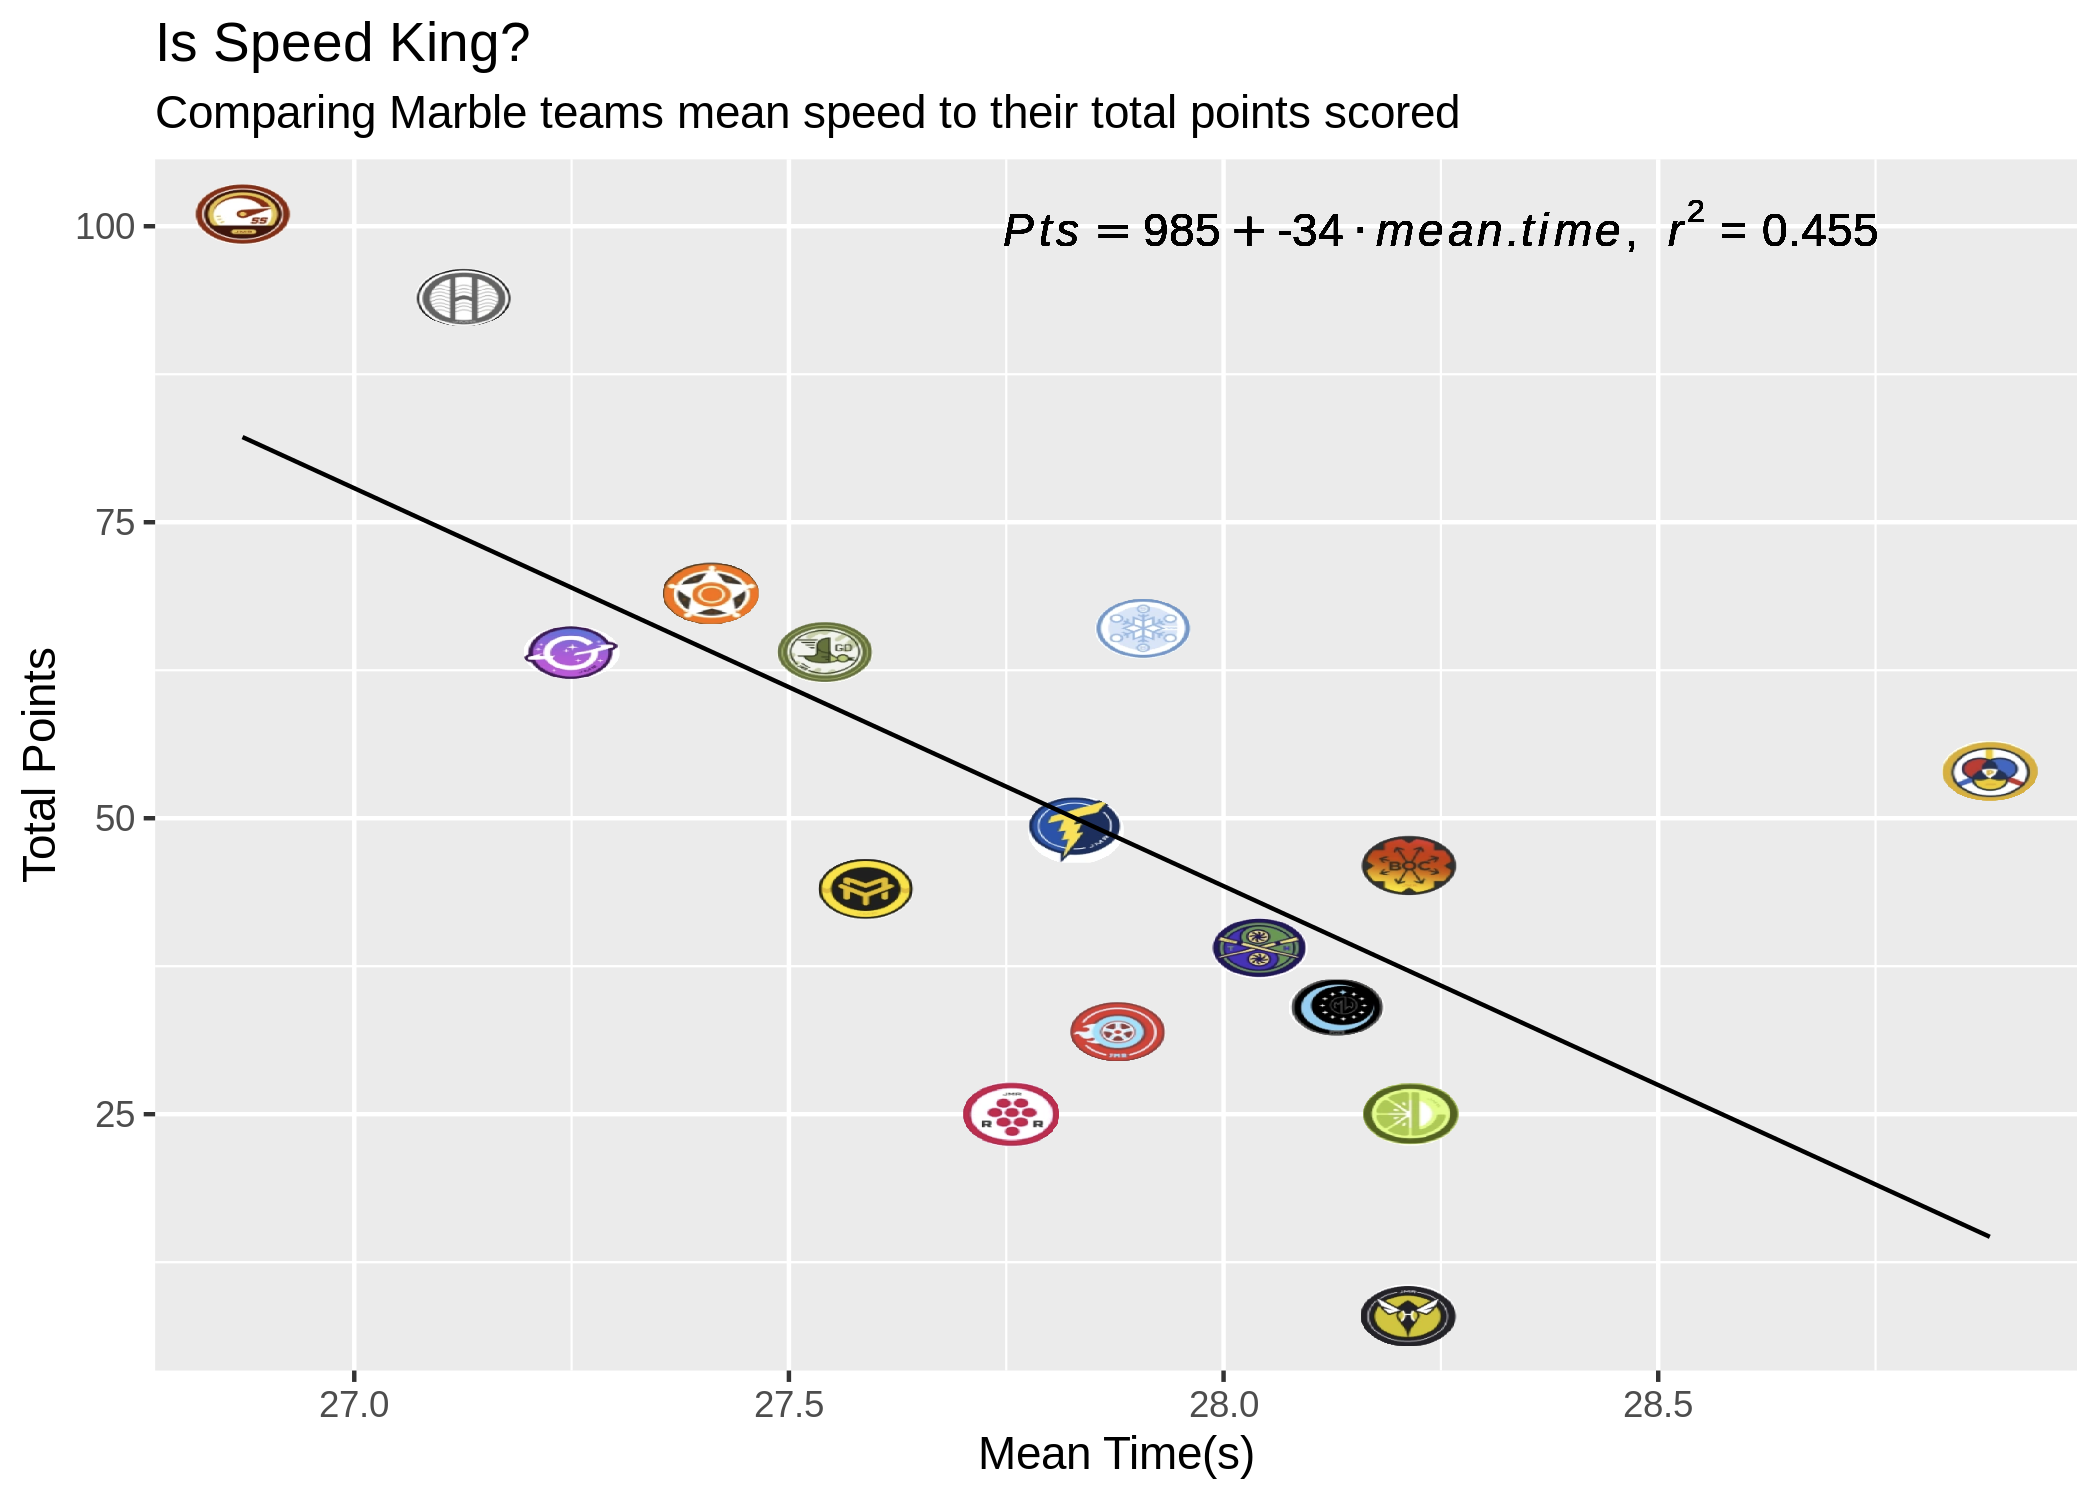

In [11]:
p1=ggplot(mar.time, aes(x=mean.time, y=Pts))
p1=p1+ geom_image(aes(image=logo), size=.05) + 
  geom_smooth(method=lm, size=0.5, color='black', se=FALSE) 
p1=p1+labs(title="Is Speed King?", 
         subtitle="Comparing Marble teams mean speed to their total points scored",
         x="Mean Time(s)",
         y="Total Points"
)
p1=p1+geom_text(x = 28.25, y = 100, label = lm_eqn(mar.time), parse = TRUE)

p1

So, if you were to bet on marbles, consistency trumps speed. 

# Is the qualifier position a good indication of a marbles finishing position?

For me, the qualifier is the preview of the main race. However, how good is the qualifier at estimating the final results? Is the winning the qualifier mean a marble will win the race, or is there no relationship between the two races.

In order to measure this is transformed the data into a long format with the following columns: Marble, Team, Round, Qualifier Position(Qual), Points(Pts). I then calculated the expected points based on qualifier position(col= expected),  the difference between expected and actual points (col=difference), and whether the difference is positive or not (col= pos).

Using this transformed dataset, I created a boxplot distribution per round of the difference between the expexted minus the actual points scored by the marble.

In [12]:
mar1<-marbles%>%select(Marble,Team, R1_Qual,R1_Pts,R2_Pts, R3_Pts,R4_Pts,R5_Pts,R6_Pts,R7_Pts,R8_Pts, R2_Qual, R3_Qual,R4_Qual,R5_Qual,R6_Qual,R7_Qual,R8_Qual)
mar.long<-mar1%>%
    as_tibble %>%
    pivot_longer(cols = !c(Marble,Team))

mar.long$round<-substr(mar.long$name, 1, 2)
mar.long$col<-ifelse(substr(mar.long$name, 3, 4)=="_Q", mar.long$col<-"Qual", mar.long$col<-"Pts")
mar.long$name<-NULL

mar.wide = mar.long %>%
      as_tibble %>%
     pivot_wider(id_cols = c( Marble, Team, round), names_from = col, values_from = value)

mar.wide$expected<-ifelse(mar.wide$Qual== 1, mar.wide$expected<-25,
                     ifelse(mar.wide$Qual==2,mar.wide$expected<-18, 
                     ifelse(mar.wide$Qual==3,mar.wide$expected<-15,
                     ifelse(mar.wide$Qual==4,mar.wide$expected<-12,
                     ifelse(mar.wide$Qual==5,mar.wide$expected<-10,
                     ifelse(mar.wide$Qual==6,mar.wide$expected<-8,
                     ifelse(mar.wide$Qual==7,mar.wide$expected<-6,
                     ifelse(mar.wide$Qual==8,mar.wide$expected<-4,
                     ifelse(mar.wide$Qual %in% c(9,10),mar.wide$expected<-2,
                     ifelse(mar.wide$Qual %in% c(11,12,13,14,15,16) ,mar.wide$expected<-4,mar.wide$expected<-NA))))))))))
mar.wide<-mar.wide%>%group_by(round)%>%mutate(difference=(expected-Pts),pos=(difference>0))

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 128 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 128 rows containing missing values (geom_point).”


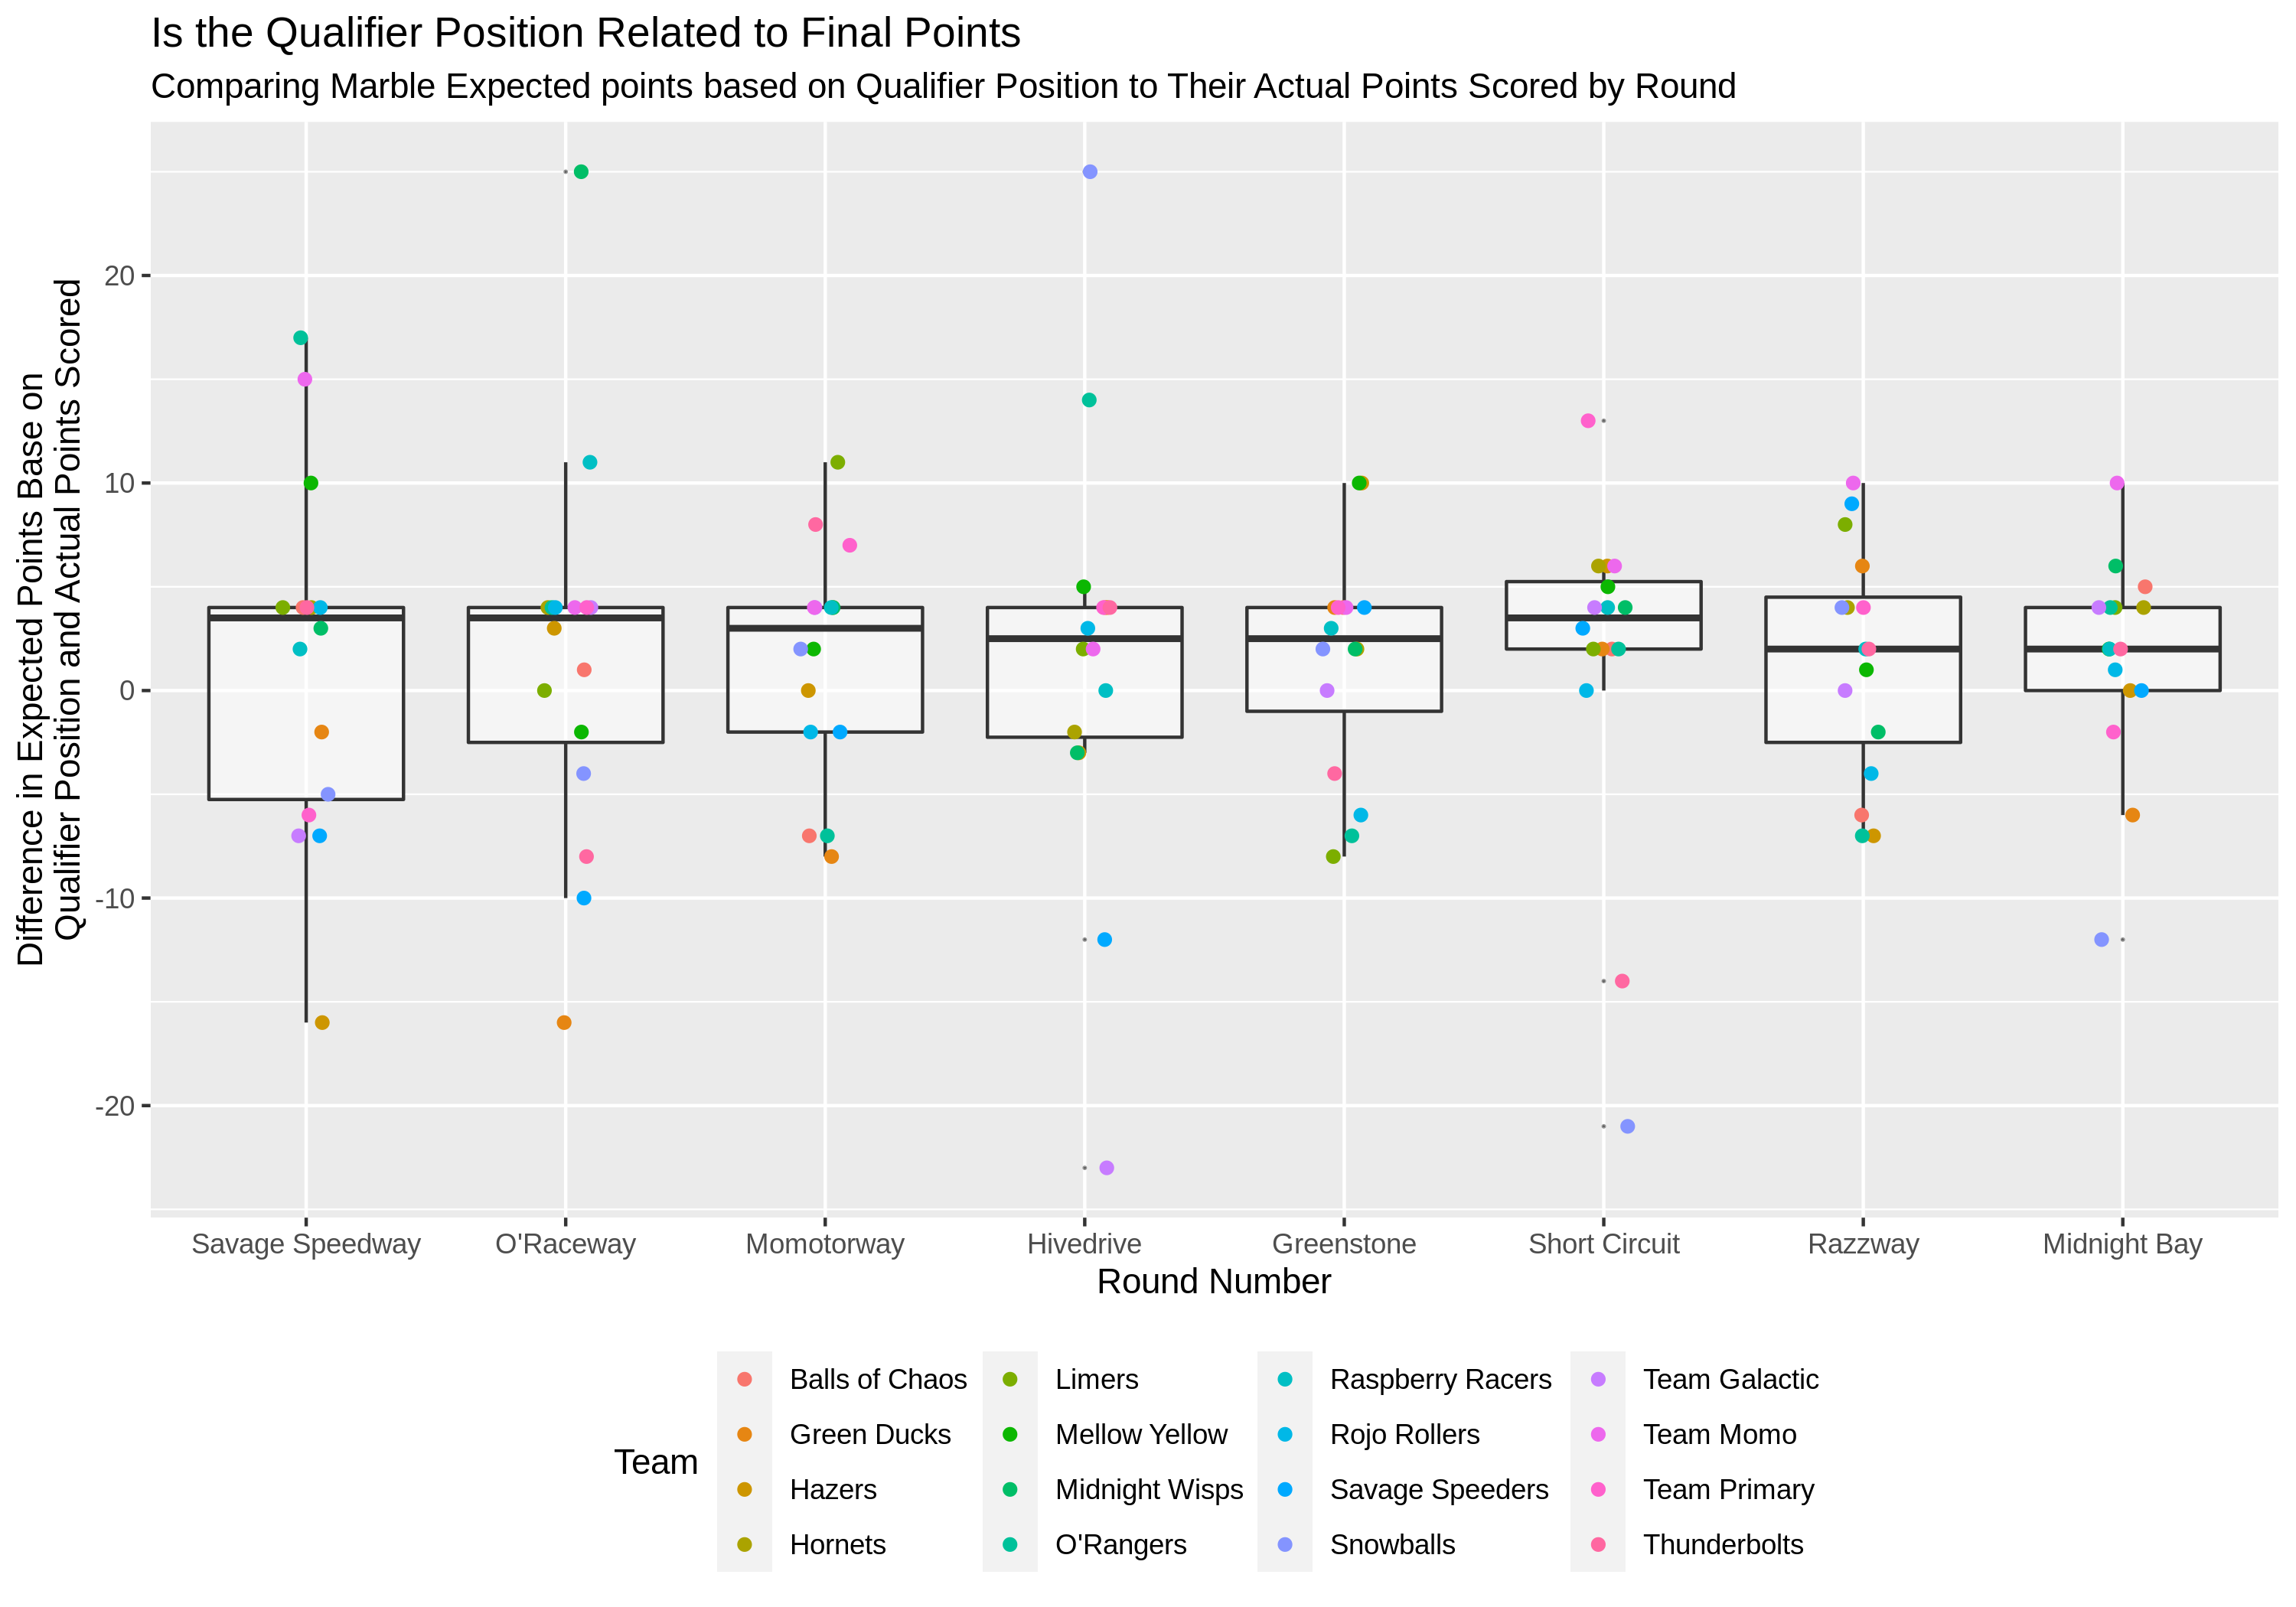

In [13]:
options(repr.plot.width=10, repr.plot.height=7, repr.plot.res=300)

mar.mediandif<-mar.wide%>%group_by(round)%>%summarize(difference=median(difference, na.rm=TRUE))

q1=ggplot(mar.wide, aes(x=round,y=difference))+geom_boxplot(alpha=0.5, outlier.size = 0)+
    geom_point(aes(color=Team),position=position_jitter(w=.1,h=0))
#                   mapping=aes(x=round, ymin=difference,ymax=difference),
#                   size=.25,
#                   color="black")
q1=q1+labs(title="Is the Qualifier Position Related to Final Points", 
         subtitle="Comparing Marble Expected points based on Qualifier Position to Their Actual Points Scored by Round",
         x="Round Number",
         y="Difference in Expected Points Base on
            Qualifier Position and Actual Points Scored"
)
q1=q1+theme(legend.position="bottom")
q1=q1+scale_x_discrete(labels = c('Savage Speedway',"O'Raceway",'Momotorway','Hivedrive','Greenstone','Short Circuit','Razzway','Midnight Bay'))
q1

# Who is a distance roller and who is the top sprinting marbles?

The Marbula 1 is a 8 race event. Since I have times for 7 of them, I wanted to know if certain marbles did better on longer courses vs shorter courses. 

Therefore, I looked at the distance of the 7 speedways. 
https://jellesmarbleruns.fandom.com/wiki/Savage_Speedway

- R1 Savage speedway: 12.81m, 13 turns
- R2 O'Raceway: 14.05m, 11 turns
- R3 Momotorway: 12.05m, 13 turns
- R4 Hivedrive: 13.20m, 11 turns
- R5 Greenstone: 14.55m, 23 turns
- R6 Short Circuit: 11.90m, 8 turns
- R7 Razzway: 14.38m, 15 turns

First, I need to know the mean track length. 

In [14]:
mean(12.81,14.05,12.05,13.20,14.55,11.90,14.38)

[1] 12.81

Using the mean as the Thresholds for sprint vs distance, I labeled tracks longer than the mean as distance and shorter than the mean as sprints. I created "Short_Pts" and "Long_Pts" columns which recorded total points scored on short or long tracks.  

In [15]:
mar.wide$Short_Pts<-ifelse(mar.wide$round %in% c("R1","R3","R6"),mar.wide$Short_Pts<-mar.wide$Pts, mar.wide$Short_Pts<-NA)
mar.wide$Long_Pts<-ifelse(mar.wide$round %in% c("R2","R4","R5","R7"),mar.wide$Long_Pts<-mar.wide$Pts,mar.wide$Long_Pts<-NA)
mar.wide%>%as_tibble()%>%print

# A tibble: 256 x 10
   Marble  Team   round  Qual   Pts expected difference pos   Short_Pts Long_Pts
   <chr>   <chr>  <chr> <dbl> <dbl>    <dbl>      <dbl> <lgl>     <dbl>    <dbl>
 1 Anarchy Balls… R1       NA    NA       NA         NA NA           NA       NA
 2 Anarchy Balls… R2        9     1        2          1 TRUE         NA        1
 3 Anarchy Balls… R3       NA    NA       NA         NA NA           NA       NA
 4 Anarchy Balls… R4       14     0        4          4 TRUE         NA        0
 5 Anarchy Balls… R5       NA    NA       NA         NA NA           NA       NA
 6 Anarchy Balls… R6       10     0        2          2 TRUE          0       NA
 7 Anarchy Balls… R7       15    10        4         -6 FALSE        NA       10
 8 Anarchy Balls… R8       NA    NA       NA         NA NA           NA       NA
 9 Clutter Balls… R1       15     0        4          4 TRUE          0       NA
10 Clutter Balls… R2       NA    NA       NA         NA NA           NA       NA
# … wit

I then used summarize to calculate the total short and long points per marble. Using  `pivot_longer` I created a long dataset
used in the charted bar charts for each marble faceted by team.

In [16]:
mar.distance<-mar.wide%>%
    group_by(Marble,Team)%>%
    summarize(Short_Pts=sum(Short_Pts,na.rm=NA),Long_Pts=sum(Long_Pts,na.rm=NA))

mar.distance<-mar.distance%>%
    as_tibble %>%
    pivot_longer(cols = !c(Marble,Team))
mar.distance%>%head


`summarise()` regrouping output by 'Marble' (override with `.groups` argument)



Marble,Team,name,value
<chr>,<chr>,<chr>,<dbl>
Anarchy,Balls of Chaos,Short_Pts,0
Anarchy,Balls of Chaos,Long_Pts,11
Billy,Green Ducks,Short_Pts,2
Billy,Green Ducks,Long_Pts,26
Bolt,Thunderbolts,Short_Pts,0
Bolt,Thunderbolts,Long_Pts,29


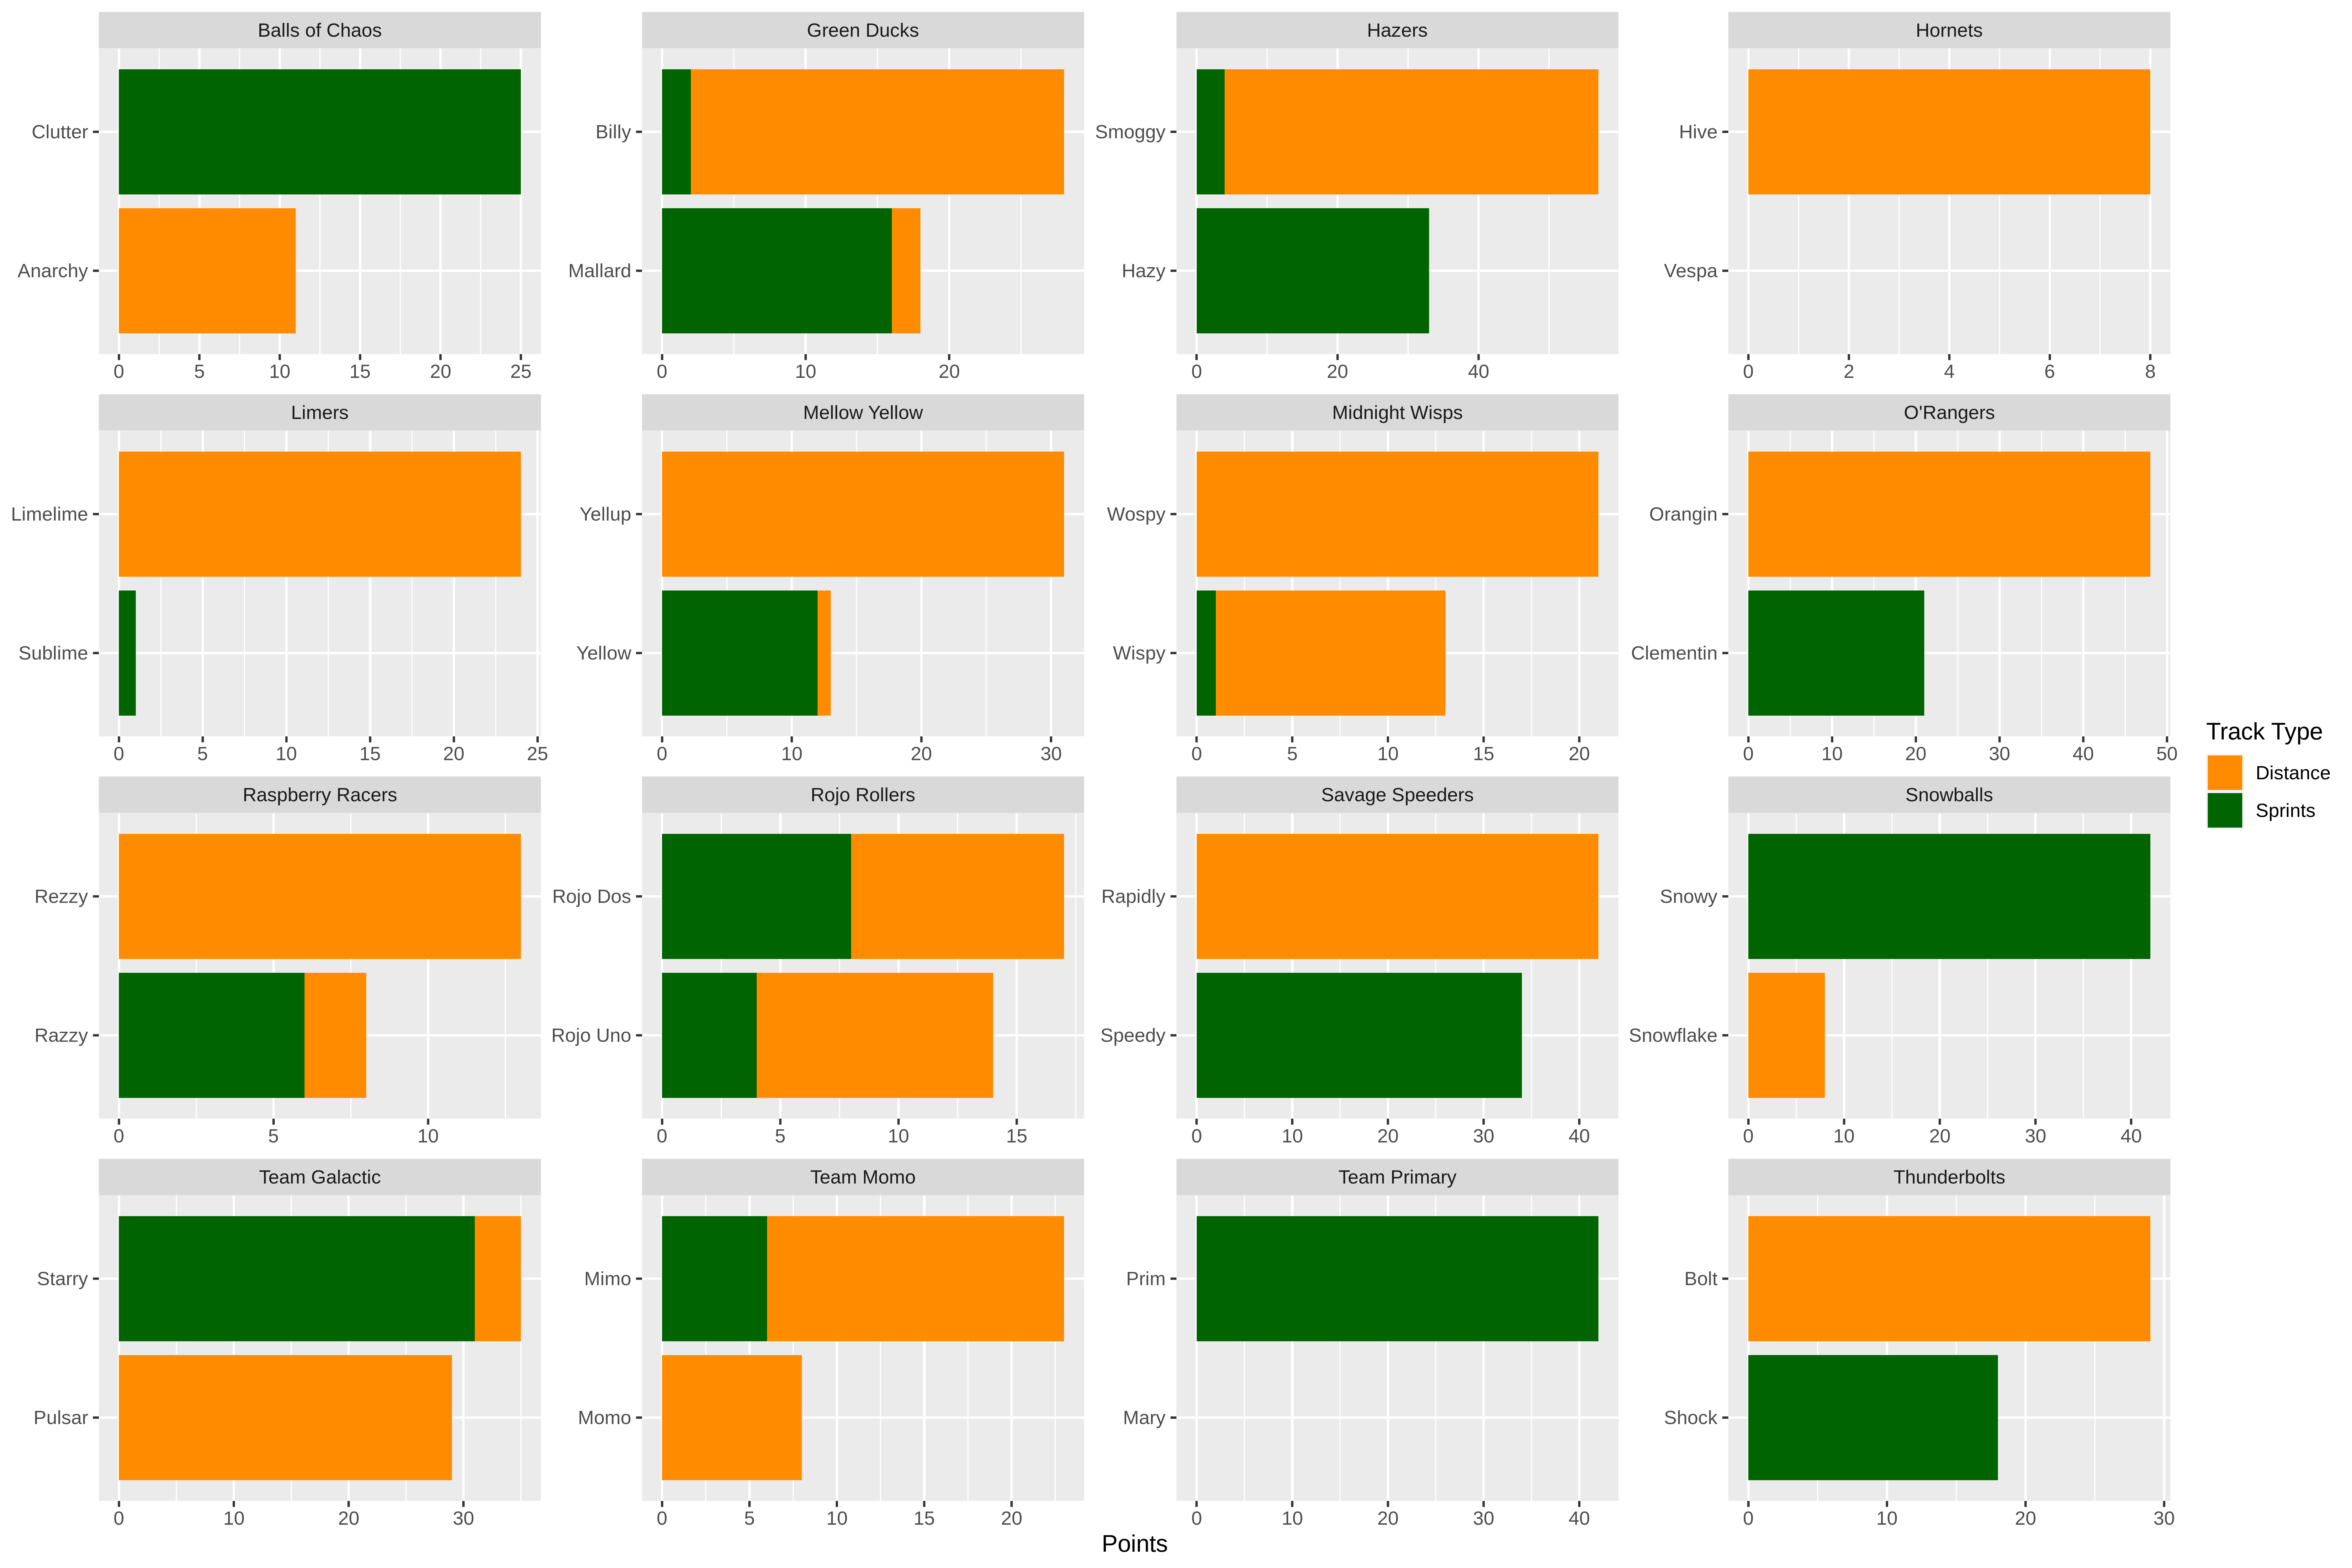

In [17]:
options(repr.plot.width=15, repr.plot.height=10, repr.plot.res=500)
dist=ggplot(mar.distance,aes(x = reorder(Marble, value), y = value, fill=name)) +
  geom_bar(stat = 'identity') +
  coord_flip() +
  facet_wrap(~Team, scales = 'free') +
  labs(x = NULL, 
       y = "Points")+
    scale_fill_manual(values=c("darkorange","darkgreen"),labels =c("Distance", "Sprints"),name = "Track Type",)
dist

Each marble earns the majority of their point in one style of race vs another- with the exception of Rojo Dos. Therefore, the length of the course seems to influence which batch of marble score points. 

# Where to bet your money?

Given everything I have looked at, qualifier position is not a good indication of which marble will win overall. However, the marble team's consistency, median speed, and the length of the course may be good indications of who will win.  This makes sense since the 2020 Marble League Championship Winners(Jun 21-Aug 8), Savage Speeders, had
    1. One of the highest consistency scores
    2. One of the fastest median race times
    3. A marble that specializes in each track length category.
during this Marbula 1 weekend event. 

In [18]:
mar.type<-mar.wide%>%
    select(Marble,Team,round,Qual,Pts)%>%
    group_by(Marble,Team)%>%
    mutate(track.length= ifelse(round=='R1',12.81,
                               ifelse(round=='R2',14.05,
                               ifelse(round=='R3',12.05,
                               ifelse(round=='R4',13.20,
                               ifelse(round=='R5',14.55,
                               ifelse(round=='R6',11.90,
                               ifelse(round=='R7',14.38,NA))))))))
mar.time<-mar.time%>% 
          select(Team,mean.time,CTP_Consistency)
mar.predict<-mar.time%>% full_join(mar.type)
mar.predict%>%as_tibble()%>%print

Joining, by = "Team"



# A tibble: 256 x 8
   Team          mean.time CTP_Consistency Marble round  Qual   Pts track.length
   <chr>             <dbl>           <dbl> <chr>  <chr> <dbl> <dbl>        <dbl>
 1 Balls of Cha…      28.2              -3 Anarc… R1       NA    NA         12.8
 2 Balls of Cha…      28.2              -3 Anarc… R2        9     1         14.0
 3 Balls of Cha…      28.2              -3 Anarc… R3       NA    NA         12.0
 4 Balls of Cha…      28.2              -3 Anarc… R4       14     0         13.2
 5 Balls of Cha…      28.2              -3 Anarc… R5       NA    NA         14.6
 6 Balls of Cha…      28.2              -3 Anarc… R6       10     0         11.9
 7 Balls of Cha…      28.2              -3 Anarc… R7       15    10         14.4
 8 Balls of Cha…      28.2              -3 Anarc… R8       NA    NA         NA  
 9 Balls of Cha…      28.2              -3 Clutt… R1       15     0         12.8
10 Balls of Cha…      28.2              -3 Clutt… R2       NA    NA         14.0
# … with

In [19]:
smp.size=floor(0.7*nrow(mar.predict))

set.seed(216)
test.disc = sample(seq_len(nrow(mar.predict)),size = smp.size)

Train = mar.predict[test.disc,]
Test = mar.predict[-test.disc,]

head(Train)

,Team,mean.time,CTP_Consistency,Marble,round,Qual,Pts,track.length
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
160,Rojo Rollers,27.87857,-0.2,Rojo Uno,R8,10,1,NA
171,Savage Speeders,26.87143,8.4,Speedy,R3,7,8,12.05
20,Green Ducks,27.54143,4.8,Billy,R4,11,0,13.20
162,Savage Speeders,26.87143,8.4,Rapidly,R2,6,18,14.05
89,Mellow Yellow,27.58857,-3.8,Yellup,R1,NA,NA,12.81
50,Hornets,28.21286,-13.4,Vespa,R2,NA,NA,14.05


In [20]:
nul_mod=glm(Pts~1, data=Train)
full_mod=glm(Pts~CTP_Consistency + mean.time + track.length + Qual, data=Train)
step(nul_mod, scope=list(lower=nul_mod, upper=full_mod, direction="both"))
# model=lm(Pts ~ CTP_Consistency * mean.time * Run_type , mar.predict)
# summary(aov(model))

Start:  AIC=641.73
Pts ~ 1



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
“using the 81/95 rows from a combined fit”


                  Df Deviance    AIC
+ Qual             1   3210.4 624.82
+ CTP_Consistency  1   3431.7 630.22
+ mean.time        1   3713.2 636.60
<none>                 4054.9 641.73
+ track.length     1   4049.0 643.61

Step:  AIC=618.83
Pts ~ Qual



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
“using the 81/95 rows from a combined fit”


                  Df Deviance    AIC
+ CTP_Consistency  1   2813.4 610.14
+ mean.time        1   3052.4 616.74
<none>                 3522.2 618.83
+ track.length     1   3205.0 620.70
- Qual             1   4577.8 641.73

Step:  AIC=607.05
Pts ~ Qual + CTP_Consistency



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
“using the 81/95 rows from a combined fit”


                  Df Deviance    AIC
<none>                 3046.8 607.05
+ mean.time        1   2813.0 609.04
+ track.length     1   2813.0 609.04
- CTP_Consistency  1   3522.2 618.83
- Qual             1   3873.6 627.87



Call:  glm(formula = Pts ~ Qual + CTP_Consistency, data = Train)

Coefficients:
    (Intercept)             Qual  CTP_Consistency  
        11.8138          -0.6678           0.3941  

Degrees of Freedom: 94 Total (i.e. Null);  92 Residual
  (84 observations deleted due to missingness)
Null Deviance:	    4578 
Residual Deviance: 3047 	AIC: 607.1

In [21]:
model=glm(formula = Pts ~ Qual + CTP_Consistency, data = Train)
fit.Test = predict(model,na.rm=TRUE, newdata=Test)
holdoutresid.Test = Test$Pts-fit.Test

mean(holdoutresid.Test,na.rm=TRUE)
sd(holdoutresid.Test,na.rm=TRUE)
CV = mean(holdoutresid.Test,na.rm=TRUE)/sd(holdoutresid.Test,na.rm=TRUE)
CV

[1] 2.163135

[1] 6.85863

[1] 0.3153888

In [23]:
team<-mar.time%>%
        select(Team,CTP_Consistency)

teams<-c('Balls of Chaos',"Hornets","Mellow Yellow","Midnight Wisps","O\'Rangers","Rojo Rollers","Savage Speeders","Snowballs","Team Momo","Team Primary","Thunderbolts","Raspberry Racers","Green Ducks","Team Galactic","Hazers")
times<-c(5.320,5.292,5.260,5.431,5.363,5.352,5.203,5.497,5.326,5.344,5.285,5.245,5.257,5.266,5.273)

Five.m<-data.frame(Team=teams,Times=times)
Five.m<-Five.m%>%arrange(Times)%>%mutate(Qual = row_number())
Five.m<-Five.m%>%left_join(team)

Five.m


Joining, by = "Team"



Team,Times,Qual,CTP_Consistency
<chr>,<dbl>,<int>,<dbl>
Savage Speeders,5.203,1,8.4
Raspberry Racers,5.245,2,-6.1
Green Ducks,5.257,3,4.8
Mellow Yellow,5.260,4,-3.8
Team Galactic,5.266,5,3.9
Hazers,5.273,6,9.3
Thunderbolts,5.285,7,-0.8
Hornets,5.292,8,-13.4
Balls of Chaos,5.320,9,-3.0


In [ ]:
predictions<-predict(model,na.rm=TRUE,newdata=Five.m, interval='confidence')
predictions<-predictions%>%as_tibble()%>%as.data.frame()
predictions
predictions<-predictions%>%mutate(id = row_number())
Five.m<-Five.m%>%mutate(id = row_number())
pred<-Five.m%>%full_join(predictions)
#pred%>%arrange(desc(value))


![alt text here](https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Screen%20Shot%202020-11-13%20at%207.56.32%20PM.png)

## Prediction
Some of the predictions were fairly close, like Savage Speeders and the general points of Green Ducks, Hazers, Team Galactic, and Thunderbolts. Mellow Yellow scored much lower than predicted and the rest were within a few points. 

Obviously the prediction was not perfect. There were teams that I didn't have consistency data on so I couldn't include and the points awarded differ slightly. Overall, I am pretty pleased with this model. I think, given consistency on all the teams, I could be a fairly sucessful Marble League Gambler. 